In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#log+Fourier
I = cv2.imread("homo.jpg", 0)
I = np.float32(I)
M, N = I.shape
I = I + 1
I_log = np.log(I)
I_fft = np.fft.fft2(I_log)

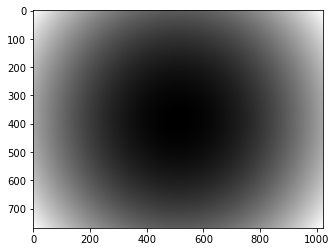

In [3]:
#High pass filter
H = np.zeros(I.shape)
GL = 0.5
GH = 1.5
c = 0.00000000001
D0 = 50
for u in range(M):
    for v in range(N):
        H[u, v] = (GH-GL)*(1-np.exp(-c*(((u-M//2)**2+(v-N//2)**2))/(D0**2)))+GL
plt.imshow(np.log(np.abs(H)), "gray")
plt.show()

In [4]:
I_FT = I_fft*(H)
I_fft_i = np.fft.ifft2(I_FT)
back2org = np.exp(np.abs(I_fft_i))-1

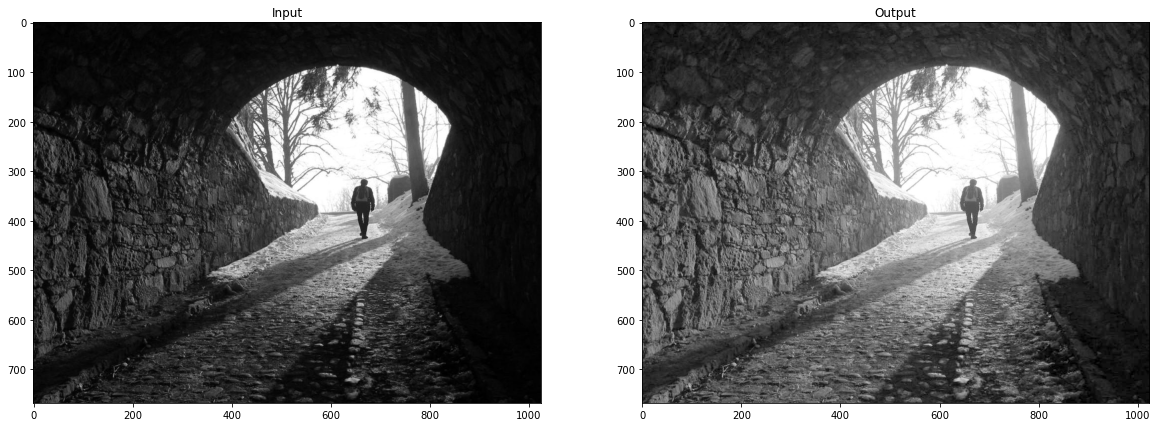

In [5]:
fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,2,1)
plt.imshow(I, "gray")
plt.title("Input")
fig.add_subplot(1,2,2)
plt.imshow(back2org, "gray")
plt.title("Output")
plt.show()